In [ ]:
# train a model to classify imgs 


In [ ]:
#upgrade TF 

In [ ]:
#import libs

import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize 
from keras.datasets import cifar10

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import load_model


In [ ]:
#load data 
(x_train, y_train), (X_test, Y_test) = cifar10.load_data()

In [ ]:
#Print the data type of x_train
print(type(x_train))
#Print the data type of y_train
print(type(y_train))
#Print the data type of x_test
print(type(X_test))
#Print the data type of y_test
print(type(Y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#get the shape of the data
print('x_train shape:', x_train.shape) #4D array 50,000 rows 32x32 pixel image with depth = 3 
#Get the shape of y_train
print('y_train shape:', y_train.shape) #2D array 50,000 rows and 1 column
#Get the shape of x_train
print('X_test shape:', X_test.shape) #4D array 10,000 rows 32x32 pixel image with depth = 3 
#Get the shape of y_train
print('Y_test shape:', Y_test.shape) #2D array 10,000 rows and 1 column

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 1)


In [ ]:
# test
#show the px value of the img at postition 0 
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

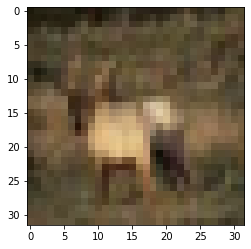

In [ ]:
#show actual visualisation of px values 
img = plt.imshow(x_train[0])

In [ ]:
# img labels 
print('The label is:', y_train[0])

The label is: [6]


In [ ]:
#Print the label of the image, NOTE: the number 6 = frog
#0 = airplane
#1 = automobile
#2 = bird
#3 = cat
#4 = deer
#5 = dog
#6 = frog
#7 = horse
#8 = ship
#9 = truck
classification = ['plane','car','bird','cat','deer','frog','horse','ship','truck']

In [ ]:
#One-Hot Encoding 
#Convert the labels into a set of 10 numbers to input into the neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
Y_test_one_hot = to_categorical(Y_test)

In [ ]:
# print the labels in the new training set
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#print the label of after one hot encoding 
print("The one hot label is: ", y_train_one_hot[0])

#test to see if the one hot encoding will return the same lablel / expecting to return 6

The one hot label is:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
#Normalise px values in the imgs to a value between 0 & 1 
# usually a px value is between 0 & 255 
# by / the x data sets by 255 we will get a value between 0 & 1 
# by normalising the data it will be easier to input into the NN 
x_train = x_train/255
X_test = X_test/255

In [ ]:
#building the Neural network (converlutional neural network)
# add model architectture - sequential 
# add layers(Dense, Flattern, Conv2D x2 & pooling x2)
# activation 'relu' - Rectifier linear unit 
# optimser 'Adam' - optimisation algortirthm which looks at stochastic gradient decent 
# loss funtion - categorical_crosstropy - used for classification classes < 2 

#architecture 
model = Sequential()

#convolutional layer - creates a feature map for the imgs 
# add input shape for the first layer - (most inputs will be 32x32 imgs)
model.add(Conv2D(32,(5,5),activation='relu',input_shape = (32,32,3)))

#pooling layer (maxpooling) - used to reduce the size of the parameters and computation for the NN 
model.add(MaxPooling2D(pool_size=(2, 2)))
#Flattern layer - changes the img to a 1d linear array for input into the CNN
model.add(Flatten())
#dense layer - add neurons to the NN with an activation funct
# softmax activation - Turns digits into probabilities. outputs a vector with the probabiltiy distro of the img/labesl 
model.add(Dense(1000, activation='relu')) # 1000 neurons in the layer 
model.add(Dense(10, activation = 'softmax'))# 10 neurons in the layer using the soft max func

#complie model with lossfucn
model.compile(loss='categorical_crossentropy',  optimizer='adam',metrics=['accuracy'])



In [ ]:
# fit the model using the CNN 
trn = model.fit(x_train, y_train_one_hot, batch_size=35, epochs =10, validation_split= 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 134s 3ms/step - loss: 1.4938 - accuracy: 0.4621 - val_loss: 1.3435 - val_accuracy: 0.5250
Epoch 2/10
40000/40000 [==============================] - 135s 3ms/step - loss: 1.1384 - accuracy: 0.5972 - val_loss: 1.1550 - val_accuracy: 0.5906
Epoch 3/10
40000/40000 [==============================] - 134s 3ms/step - loss: 0.9149 - accuracy: 0.6788 - val_loss: 1.1093 - val_accuracy: 0.6222
Epoch 4/10
40000/40000 [==============================] - 132s 3ms/step - loss: 0.7045 - accuracy: 0.7528 - val_loss: 1.0894 - val_accuracy: 0.6450
Epoch 5/10
40000/40000 [==============================] - 135s 3ms/step - loss: 0.5105 - accuracy: 0.8237 - val_loss: 1.1659 - val_accuracy: 0.6426
Epoch 6/10
40000/40000 [==============================] - 136s 3ms/step - loss: 0.3415 - accuracy: 0.8854 - val_loss: 1.3170 - val_accuracy: 0.6374
Epoch 7/10
40000/40000 [==============================] - 136s

In [ ]:
model.evaluate(X_test, Y_test_one_hot)[1]

10000/10000 [==============================] - 6s 648us/step


0.6359000205993652

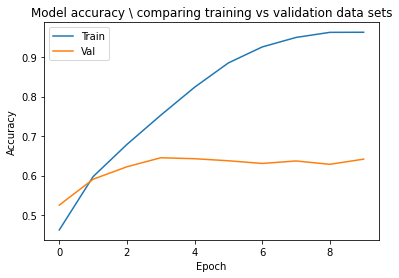

In [ ]:
#visualtisation of the models acc 
plt.plot(trn.history['accuracy'])
plt.plot(trn.history['val_accuracy'])
plt.title('Model accuracy \ comparing training vs validation data sets')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

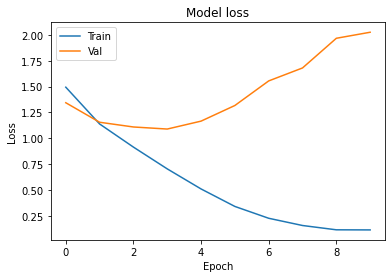

In [ ]:
#visualise the models loss
plt.plot(trn.history['loss'])
plt.plot(trn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
#inputing img to the model
from google.colab import files
uploaded = files.upload()

Saving car.jpg to car.jpg


TypeError: ignored

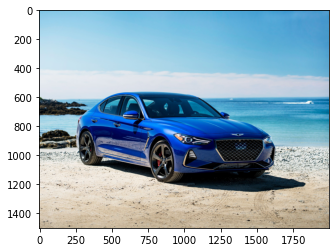

In [ ]:
#display img 
img = plt.imread('car.jpg')
showImg = plt.imshow(img)

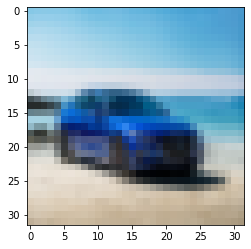

In [ ]:
#resize img to fit the model 
#32x32px 
#depth 3
from skimage.transform import resize
resized_img= resize(img,(32,32,3))
showImg = plt.imshow(resized_img)

In [ ]:
#model prediction
pred = model.predict(np.array([resized_img]))
# sort the porbabbility of predictions
probability_index = [0,1,2,3,4,5,6,7,8,9]
x = pred
# loop through the index to find the hightest match 
for i in range(10):
  for j in range(10):
    if x[0][probability_index[i]] > x[0][probability_index[j]]:
      tempList = probability_index[i]
      probability_index[i] = probability_index[j]
      probability_index[j] = tempList
# show probability labels in order
print(probability_index)      

[1, 9, 0, 4, 8, 7, 2, 3, 5, 6]


In [ ]:
#printing top 3 of the models predictions
for i in range (i):
  print(classification[probability_index[i]])

car
